# Visualizing FordGoBike Data

## by Lara Alfayyadh


### Introduce dataset .
> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be taken from one station and returned to any other in the system. People use bike share to go to work or school or more. The ride of bike fun, convenient and affordable way to get around. 
The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

## Preliminary Wrangling
> It's time to collect and explore our data. In this project, The dataset consist of approximately 311894 bike rides from 2018( Jan-Dec).

## Gathering Data


In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import glob
import os
import datetime

> Load dataset. I have joined 4 files of dataset into one called 'merge_file.csv'

In [2]:
path = '/Users/eng.mona/Desktop/merge'

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

df.to_csv('merge_file.csv', index=False)

/Users/eng.mona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('merge_file.csv')

/Users/eng.mona/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Assessing Data



In [4]:
# showing first 70 rows to understand the data
df.sample(70)

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_time,trip_id,trip_route_category
163389,6262,NaN,86,34.144588,-118.144592,4142,2018-04-04 17:07:00,Walk-up,0,34.144588,-118.144592,4142,2018-04-04 15:41:00,80256903,Round Trip
240199,6362,standard,62,34.048401,-118.260948,3035,2018-10-03 07:40:00,Monthly Pass,30,34.048401,-118.260948,3035,2018-10-03 06:38:00,106569409,Round Trip
286693,6284,standard,1440,NaN,NaN,3000,2018-11-26 07:45:00,Walk-up,1,34.042110,-118.256187,3075,2018-11-24 23:22:00,110244994,One Way
276500,12398,standard,4,34.045181,-118.250237,3067,2018-11-11 17:15:00,Monthly Pass,30,34.048038,-118.253738,3063,2018-11-11 17:11:00,109222821,One Way
107463,12162,NaN,30,33.995560,-118.481552,4214,2018-08-11 15:15:00,Walk-up,1,33.995560,-118.481552,4214,2018-08-11 14:45:00,102604150,Round Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35118,6339,NaN,3,34.050880,-118.248253,3069,2018-02-17 18:58:00,Monthly Pass,30,34.048851,-118.246422,3029,2018-02-17 18:55:00,73026847,One Way
109071,12250,NaN,39,33.991161,-118.468292,4202,2018-08-12 22:40:00,Walk-up,1,33.991161,-118.468292,4202,2018-08-12 22:01:00,102848497,Round Trip
293115,12119,standard,13,34.026291,-118.277687,4266,2018-12-02 18:01:00,One Day Pass,1,34.042061,-118.263382,3034,2018-12-02 17:48:00,110599342,One Way
310014,12239,standard,5,34.048500,-118.258537,3005,2018-12-29 08:25:00,Monthly Pass,30,34.046822,-118.248352,3038,2018-12-29 08:20:00,112365334,One Way


In [5]:
# look for null values and more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311894 entries, 0 to 311893
Data columns (total 15 columns):
bike_id                311894 non-null int64
bike_type              73867 non-null object
duration               311894 non-null int64
end_lat                306771 non-null float64
end_lon                306771 non-null float64
end_station            311894 non-null int64
end_time               311894 non-null object
passholder_type        311894 non-null object
plan_duration          311894 non-null int64
start_lat              311146 non-null float64
start_lon              311146 non-null float64
start_station          311894 non-null int64
start_time             311894 non-null object
trip_id                311894 non-null int64
trip_route_category    311894 non-null object
dtypes: float64(4), int64(6), object(5)
memory usage: 35.7+ MB


In [6]:
# Check for duplicate values 
df.duplicated().sum()

0

In [7]:
# View descriptive statistics
df.describe()

,bike_id,duration,end_lat,end_lon,end_station,plan_duration,start_lat,start_lon,start_station,trip_id
count,311894.000000,311894.000000,306771.000000,306771.000000,311894.000000,311894.000000,311146.000000,311146.000000,311894.000000,3.118940e+05
mean,8308.978724,41.163347,34.037586,-118.288666,3402.356624,27.261262,34.037540,-118.288229,3407.500500,9.393850e+07
std,2918.540362,133.205595,0.058114,0.099414,537.619663,61.769440,0.058539,0.098496,538.636065,1.395387e+07
min,4727.000000,1.000000,33.710979,-118.491341,3000.000000,0.000000,33.710979,-118.491341,3000.000000,6.540635e+07
25%,6084.000000,7.000000,34.034801,-118.267982,3030.000000,1.000000,34.034801,-118.267982,3030.000000,8.224112e+07
50%,6480.000000,13.000000,34.046070,-118.254868,3058.000000,30.000000,34.046520,-118.254593,3063.000000,9.731799e+07
75%,12097.000000,29.000000,34.050480,-118.241562,4162.000000,30.000000,34.050911,-118.243530,4163.000000,1.062653e+08
max,15075.000000,1440.000000,34.165291,-118.116539,4276.000000,365.000000,34.165291,-118.116539,4276.000000,1.127323e+08


#### Quality issues
* start_time and end_time are objects not a timestamps
* bike_id, start_station, end_station should be set to object
* We can enhance the dataset with more details like month, day, hour, weekday to use it in our investigation



## Cleaning Data


In [8]:
# Create copies of original dataframes to work with
df_clean = df.copy()

#### Define
Change start_time and end_time to timestamps

#### Code

In [9]:
# Change start_time and end_time to timestamps

#code
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#### Define
Change bike id, start_station_id, end_station_id to object

#### Code

In [10]:
# Code
# Change bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station = df_clean.start_station.astype(str)
df_clean.end_station = df_clean.end_station.astype(str)

#### Test

In [11]:
# Test define 1 and 2
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311894 entries, 0 to 311893
Data columns (total 15 columns):
bike_id                311894 non-null object
bike_type              73867 non-null object
duration               311894 non-null int64
end_lat                306771 non-null float64
end_lon                306771 non-null float64
end_station            311894 non-null object
end_time               311894 non-null datetime64[ns]
passholder_type        311894 non-null object
plan_duration          311894 non-null int64
start_lat              311146 non-null float64
start_lon              311146 non-null float64
start_station          311894 non-null object
start_time             311894 non-null datetime64[ns]
trip_id                311894 non-null int64
trip_route_category    311894 non-null object
dtypes: datetime64[ns](2), float64(4), int64(3), object(6)
memory usage: 35.7+ MB


In [12]:
# Start time month (Jan - Dec)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

In [13]:
# get dayofweek and hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')

In [14]:
# get start time by day
df_clean['start_time_day'] = df_clean['start_time'].dt.day.astype(int)

In [15]:
# get start time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

In [16]:
# Convert the duration of ride from seconds to minutes
df_clean['duration_min'] = df_clean['duration']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [17]:
# Show the new columns has been added above
df_clean.sample(70)

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_time,trip_id,trip_route_category,start_time_month,start_time_dayofweek,start_time_day,start_time_hour,duration_min
171677,12022,NaN,9,34.049301,-118.238808,3042,2018-04-14 15:32:00,Walk-up,0,34.051941,-118.243530,3030,2018-04-14 15:23:00,81897322,One Way,April,Sat,14,15,0
251715,6653,standard,16,34.046612,-118.262733,3008,2018-10-15 12:11:00,Monthly Pass,30,34.046520,-118.237411,3082,2018-10-15 11:55:00,107397951,One Way,October,Mon,15,11,0
59382,5956,NaN,18,34.050880,-118.248253,3069,2018-03-24 19:38:00,Walk-up,0,34.064281,-118.238937,3078,2018-03-24 19:20:00,78448468,One Way,March,Sat,24,19,0
91816,5815,NaN,95,34.014309,-118.491341,4215,2018-07-28 16:57:00,Walk-up,1,33.991161,-118.468292,4202,2018-07-28 15:22:00,99723922,One Way,July,Sat,28,15,1
193627,6614,NaN,7,34.049301,-118.238808,3042,2018-05-10 10:17:00,Walk-up,0,34.050140,-118.233238,3079,2018-05-10 10:10:00,86181973,One Way,May,Thu,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59814,6486,NaN,19,34.063389,-118.236160,3066,2018-03-25 13:46:00,One Day Pass,1,34.056610,-118.237213,3014,2018-03-25 13:27:00,78565597,One Way,March,Sun,25,13,0
287464,6302,standard,50,33.996239,-118.477448,4209,2018-11-26 10:27:00,Monthly Pass,30,33.988129,-118.471741,4212,2018-11-26 09:37:00,110212698,One Way,November,Mon,26,9,0
171342,5991,NaN,6,34.042061,-118.263382,3034,2018-04-14 10:12:00,Monthly Pass,30,34.044701,-118.252441,3031,2018-04-14 10:06:00,81861907,One Way,April,Sat,14,10,0
302619,6032,standard,6,34.044701,-118.252441,3031,2018-12-17 13:48:00,Walk-up,1,34.051102,-118.264557,3052,2018-12-17 13:42:00,111604339,One Way,December,Mon,17,13,0


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311894 entries, 0 to 311893
Data columns (total 20 columns):
bike_id                 311894 non-null object
bike_type               73867 non-null object
duration                311894 non-null int64
end_lat                 306771 non-null float64
end_lon                 306771 non-null float64
end_station             311894 non-null object
end_time                311894 non-null datetime64[ns]
passholder_type         311894 non-null object
plan_duration           311894 non-null int64
start_lat               311146 non-null float64
start_lon               311146 non-null float64
start_station           311894 non-null object
start_time              311894 non-null datetime64[ns]
trip_id                 311894 non-null int64
trip_route_category     311894 non-null object
start_time_month        311894 non-null object
start_time_dayofweek    311894 non-null object
start_time_day          311894 non-null int64
start_time_hour         3118

### What is the structure of your dataset?

> The Ford GoBike data is understandable and it has been collected efficiently there is no null or depulecated valus only few quality issus.
The dataset has 311894 bike rides from 2018( Jan-Dec).The column header descriptions are as follows:
* Duration
 1. Start Time
 2. End Time 
 3. Plan Duration	
* Start Station
 1. Start Station Latitude
 2. Start Station Longitude
* End Station
 1. End Station
 2. End Station Latitude
 3. End Station Longitude
* Bike ID
 1. Bike Type (standard, electric or NaN)
 2. Passholder Type (Walk-up, Monthly Pass, One Day Pass, Flex Pass or Annual Pass)
* Trip ID 
 1. Trip Route Category (One Way or Round Trip)


> I added the following columns in my cleaning work to support my analysis:
* start Time month
* start Time day
* start Time DayoftheWeek
* start_time_hour
* duration_min





### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out when and where bikes are in high demand (during the day/weekday/month/ minutes) for both users. These features can be used to make business decisions such as how can I attract the customer to be a subscriber,  should I offer discounts coupons, or targeting them by marketing campaigns and when.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the following features may help to support my investigation:

* Start Time month
* Start Time day
* Start Time DayoftheWeek
* start_time_hour
* duration_min
* user type

## Univariate Exploration


In [19]:
# First will see what the numbers we expect to visiulaize 
df_clean.start_time_month.describe()

count     311894
unique        12
top       August
freq       33328
Name: start_time_month, dtype: object

> First I'll start by looking at the monthly trend for number of bike rentals during the first 6 months of the year

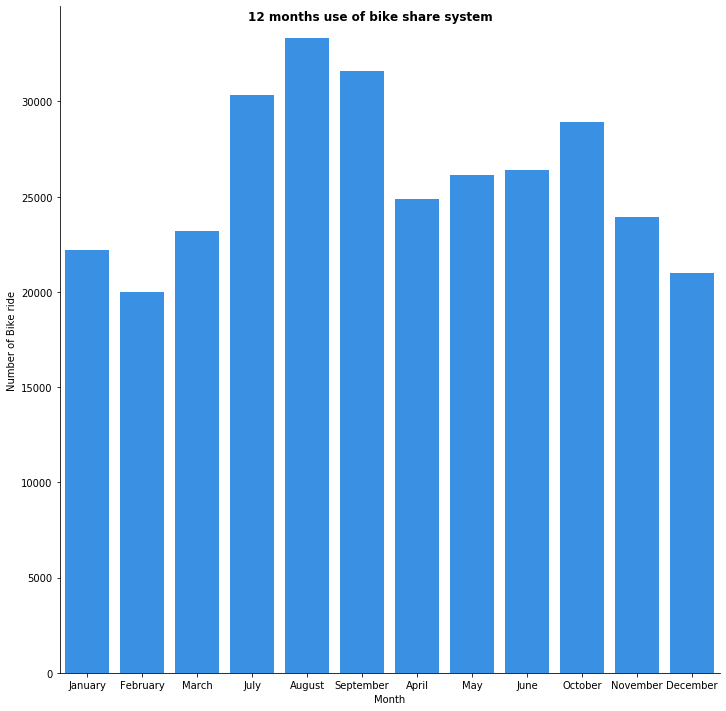

In [20]:
# monthly use of the bike sharing system

# function of catplot
def catplot_func(dataF, theX, theKind, theColor, theHeight, x_labels, y_labels, title, font):
    f_graph = sb.catplot(data = dataF, x = theX, kind = theKind, color = theColor, height = theHeight)
    f_graph.set_axis_labels(x_labels, y_labels)
    f_graph.fig.suptitle(title, fontweight = font);
    
# Calling the function
catplot_func(df_clean, 'start_time_month', 'count','#1E90FF', 10, "Month", "Number of Bike ride", '12 months use of bike share system', 'semibold')

In [21]:
df_clean[df_clean.start_time_month == 'August'].count()[0]

33328

> The above figure show number of rides for each month. And we can see August is has the highest number of rides (trips) 33328 rides.

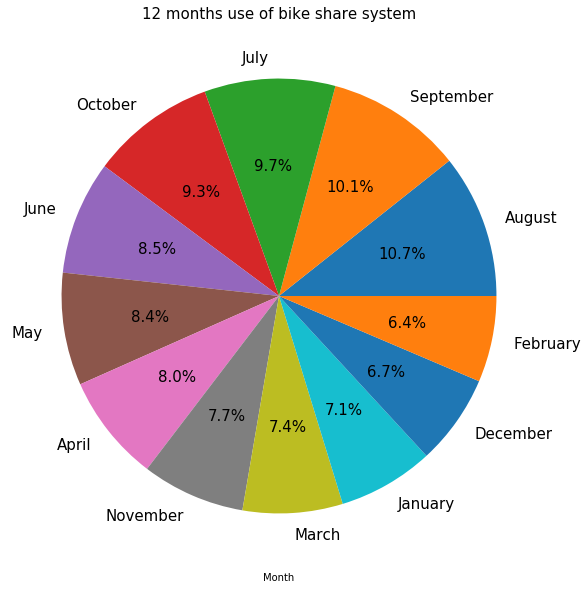

In [22]:
# monthly use of the bike sharing system
df_clean.start_time_month.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.1f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Month')
ax.set_title("12 months use of bike share system", fontsize=15);

> The above figure show percentage of rides for each month. And we can see August is has the highest number of rides (trips)

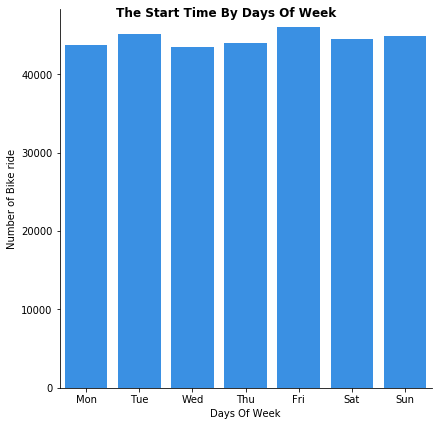

In [23]:
# Show the start_time_dayofweek use of the bike sharing system

# Calling the function
catplot_func(df_clean, 'start_time_dayofweek', 'count','#1E90FF', 6, "Days Of Week", "Number of Bike ride", 'The Start Time By Days Of Week', 'semibold')

> As we can see, The bike does have the highest number of bikers on Tuesday and Friday. 

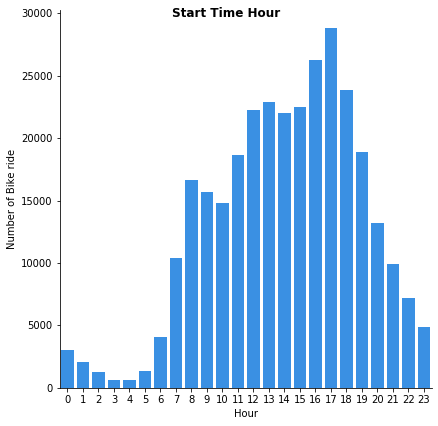

In [24]:
# Show the start_time_hour use of the bike sharing system

# Calling the function
catplot_func(df_clean, 'start_time_hour', 'count','#1E90FF', 6, "Hour", "Number of Bike ride", 'Start Time Hour', 'semibold')

> As we can see, the above figure show the number of rides (trips) for each hour, the two peak hours are 8:00 AM to 7:00 PM they are have the highest number of rides and that because the work hours (start and end work). Also we can see the rides between 12:00 AM and 5:00 AM have the lowest number of rides and that hours sleep.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Due to the cleaning efforts,  there were no unusual points in the exploratory and visualization phase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> So far nothing seems as unusual distributions for a bike-sharing system. The data reveals that the weekday has the highest number of bikers which I didn't expect.

## Bivariate Exploration

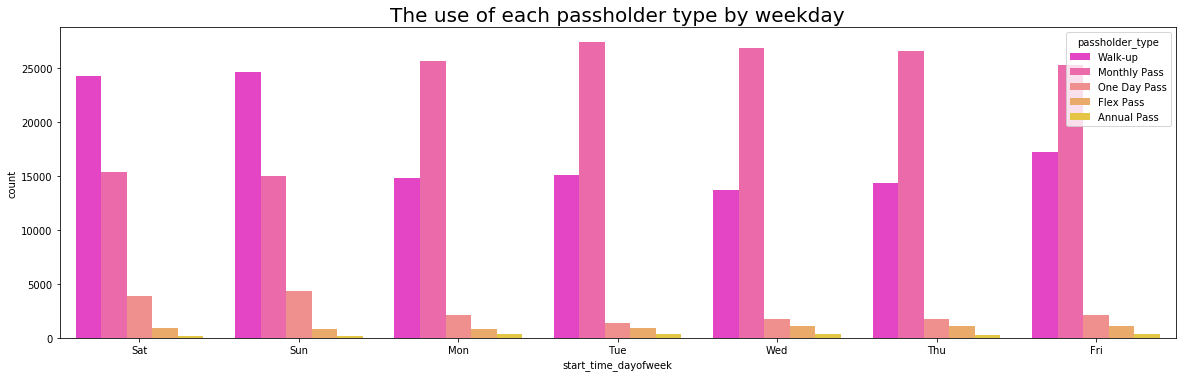

In [25]:
# Setting the days into order
df_clean['start_time_dayofweek'] = pd.Categorical(df_clean['start_time_dayofweek'], 
                                                categories=['Sat','Sun','Mon','Tue','Wed', 'Thu','Fri'],  ordered=True)
# Show the number of use by day for each passholder type 

# function of countplot
def countplot_func(dataF, theX, theHue,thePalette, theTitle, theFont):
    # Make the fiqure size
    plt.figure(figsize = [20, 40]);

    # Size of subplot
    ax = plt.subplot(6, 1, 5);

    sb.countplot(data = dataF, x = theX, hue = theHue, palette = thePalette).set_title(theTitle, fontsize = theFont);
# Calling the function
countplot_func(df_clean,'start_time_dayofweek', 'passholder_type', 'spring', 'The use of each passholder type by weekday', 20)

> Tuesday has the most 'Monthly Pass' bikers compared to other days, Then Wednesday and Thursday are approximately similar to the number of bikers on Tuesday. On the other hand the, the highest number of 'Walk-up' bikers on Sunday then Saturday compared to other days which is due to the weekend.

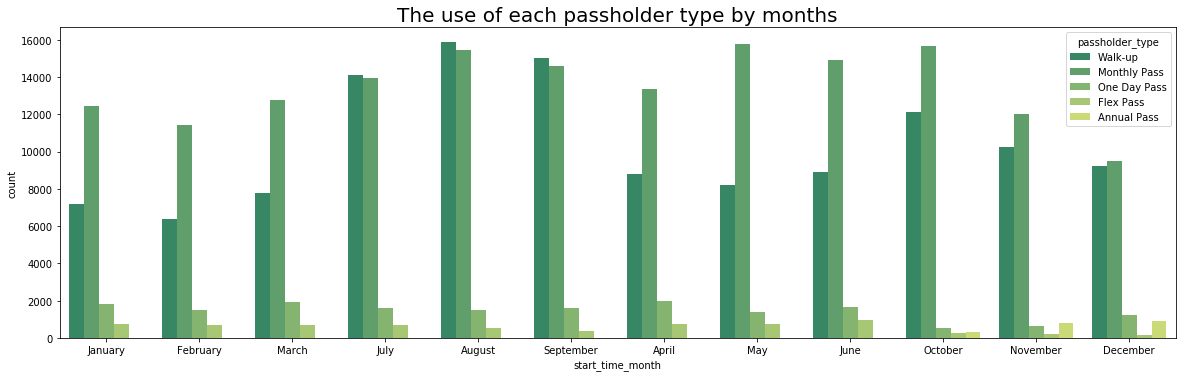

In [26]:
# Show the number of use by month for each passholder type 
# Calling the function
countplot_func(df_clean, 'start_time_month', 'passholder_type', 'summer', 'The use of each passholder type by months', 20)

> As we can see, the share bike system trends for 'Walk-up' and 'Monthly Pass'  which is on July, August and September

/Users/eng.mona/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


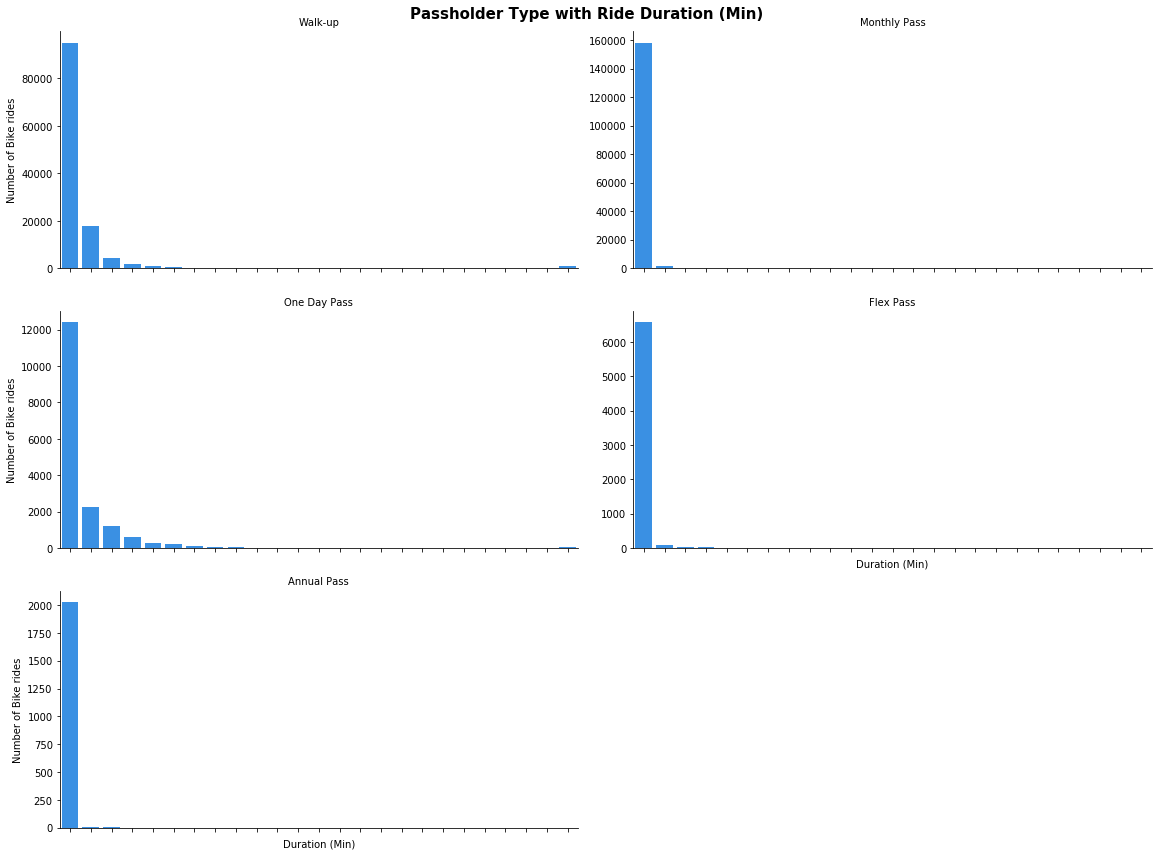

In [27]:
# passholder_type Usage by Min Duration 
data = df_clean.query('duration_min < 45')
gr = sb.catplot(data = df_clean, x = 'duration_min', col='passholder_type', kind='count', sharey = False, color = '#1E90FF', height = 8, aspect= 2, col_wrap = 2, size = 4);

gr.set_axis_labels('Duration (Min)', 'Number of Bike rides')
gr.set_titles('{col_name}')

gr.fig.suptitle('Passholder Type with Ride Duration (Min)', y=1.00, fontsize=15, fontweight='bold');
gr.set_xticklabels(rotation=75);

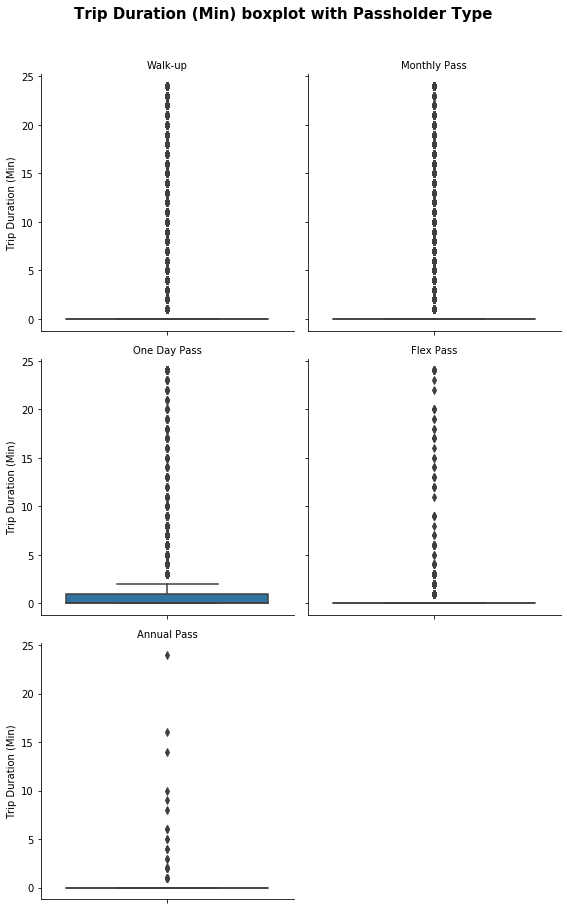

In [28]:
# Code for the boxplot duration (Min) distribution 
con = df_clean.query('duration_min < 45')
g1 = sb.catplot(data=con, y='duration_min', col="passholder_type", kind='box', col_wrap = 2, size = 4)
g1.set_titles(col_template = '{col_name}')
g1.set_axis_labels("", "Trip Duration (Min)")
g1.fig.suptitle('Trip Duration (Min) boxplot with Passholder Type', y=1.05, fontsize=15, fontweight='semibold');

> The graphs above shows the ride duration spread in minutes to visualize the trends of Walk-up, Monthly Pass, One Day Pass, Flex Pass and Annual Pass easier. For the Monthly and Annual Pass the ride duration is not that long, that make us conclude that they uses the bike for short trips like school, work, or other. On the other hand, the Walk-up and One Day Pass then Flex Pass have ride durations longer which is quite not what I expected.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 Adding the Passholder Type to the analysis depicted different usage Walk-up, Monthly Pass, One Day Pass, Flex Pass and Annual Pass.
* The Walk-up's peak time in August which is summer season and most often on Saturday and Sunday which is weekend maybe they are tourist or to do family, friends activities.
* The bike duration for 'One Day Pass' biker is longer than the duration of the 'Monthly Pass' bikers.
* 'Monthly Pass' bikers use the bike-sharing system during the weekday and more often in May and for a short ride. 
##### To sum up the data give us a clear idea that most of the ‘Monthly Pass’ are employees or students who use the system in the weekday and at the trend hours for going to work or back which are (8:00 AM to 7:00 PM)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Tuesday has the most 'Monthly Pass' bikers compared to other days. Sunday has the most 'Walk-up' bikers compared to other days.
for the Walk-up it is clear because it is weekend but for the Monthly Pass there is no clear reason why Tuesday is the highest.

## Multivariate Exploration


Text(0, 0.5, 'Trip Duration Min')

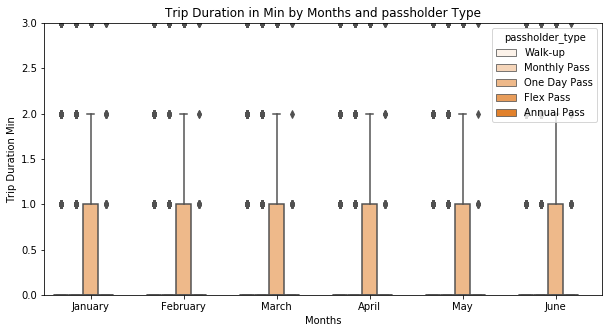

In [29]:
# Here we have to focus on knowing if passholder_type leads to the heigher duration

plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]


# Setting the monthes into order
df_clean['start_time_month'] = pd.Categorical(df_clean['start_time_month'], 
                                                categories=['January','February','March','April','May', 'June'], 
                                                ordered=True)

gs = sb.boxplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'passholder_type', color = base_color)
plt.ylim([0, 3])
plt.title('Trip Duration in Min by Months and passholder Type')
plt.xlabel('Months')
plt.ylabel('Trip Duration Min')

> ##### As we can see, the One Day Pass use the bike-sharing system more than Walk-up,  Flex, Monthly and Annual Pass. Based on that data we can give the  One Day Pass offer so we can benefit more since there is a high demand on the bikes by them.

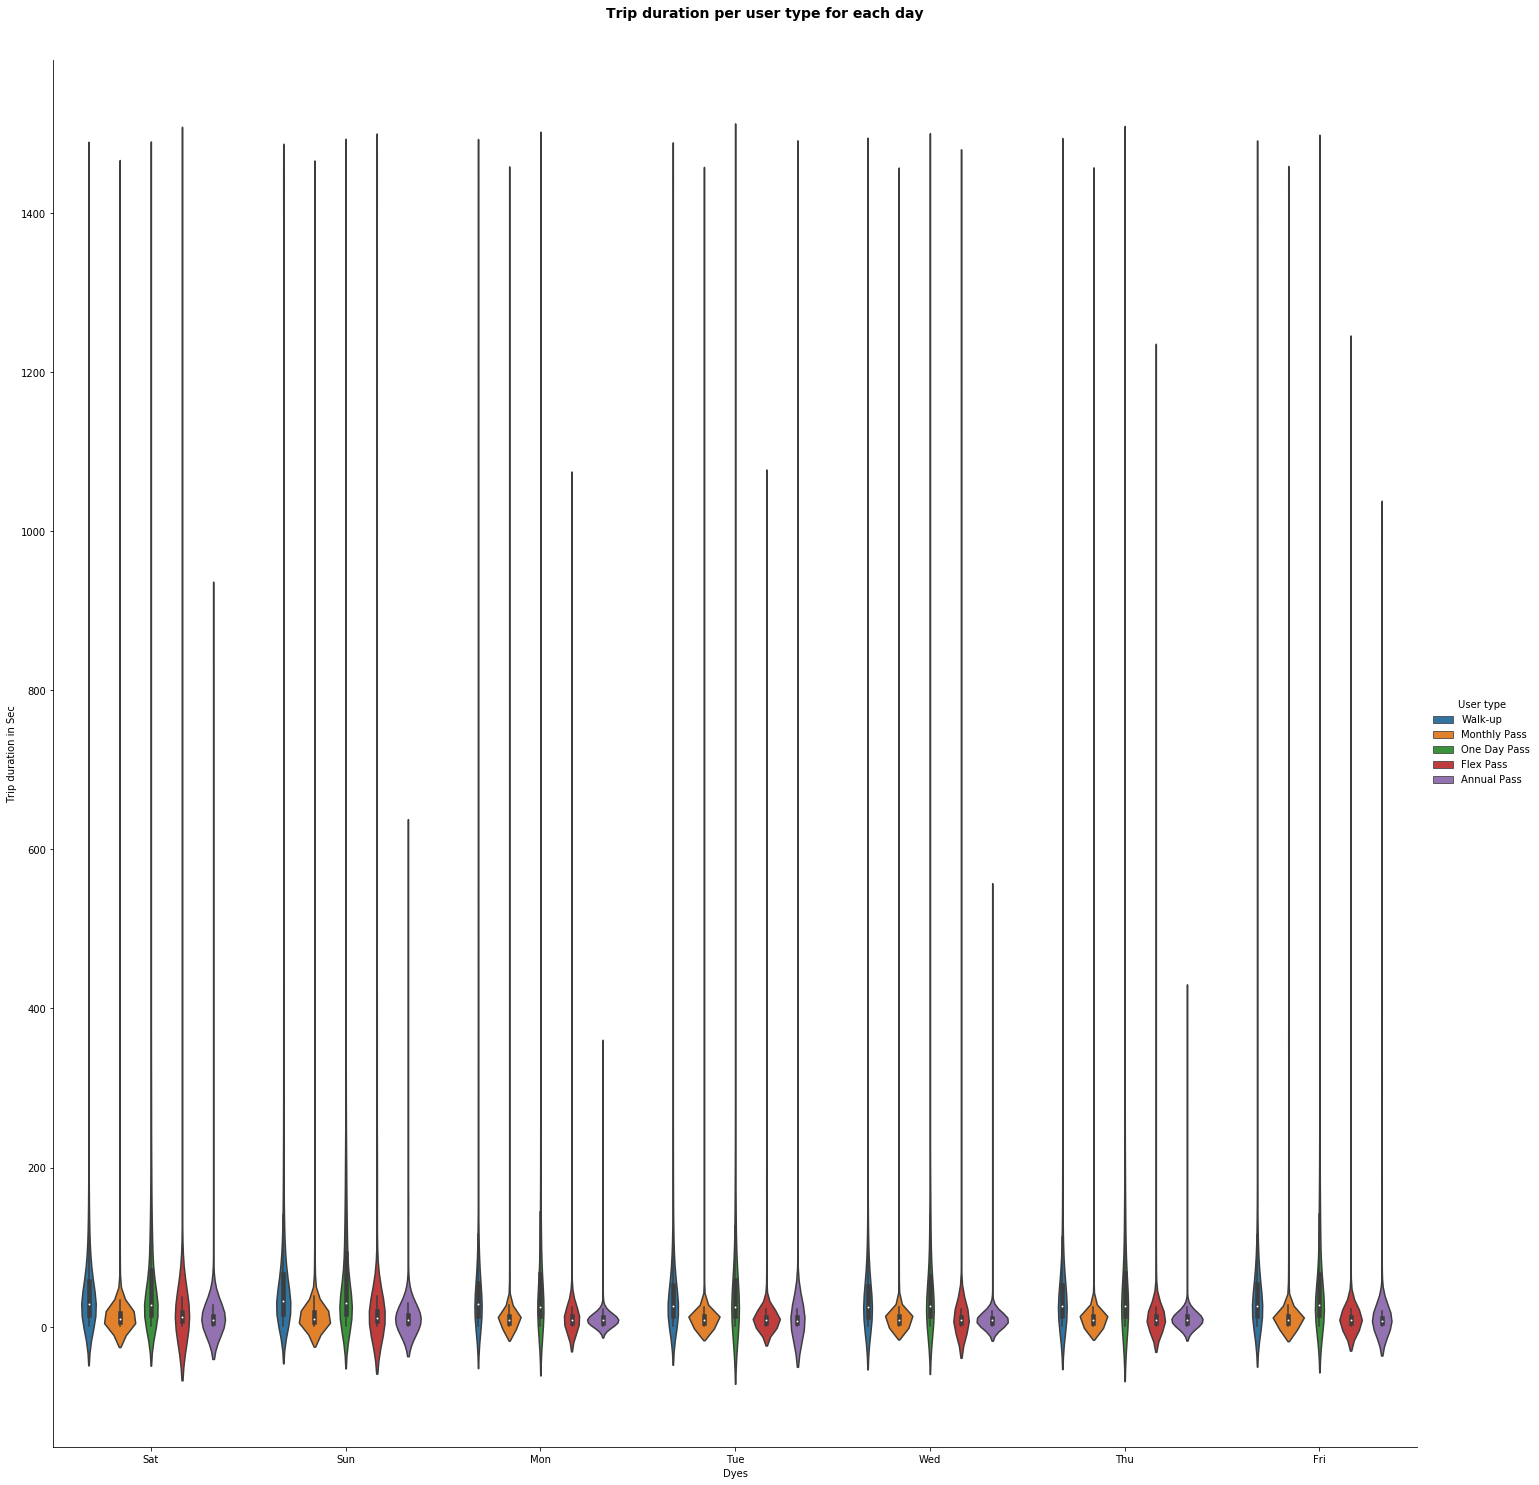

In [30]:
# show the start_time_dayofweek by duration_sec and user_type

g = sb.catplot(data=data, x='start_time_dayofweek', y="duration", hue="passholder_type", kind="violin", height = 20)

g.set_axis_labels("Dyes", "Trip duration in Sec")
g._legend.set_title('User type')
g.fig.suptitle('Trip duration per user type for each day', y=1.03, fontsize=14, fontweight='semibold');

> ##### As we can see, the Walk-up duration is more during the weekend especially on Sunday and Saturday. but for the Monthly Pass, all the weekday are quite similar in the duration.

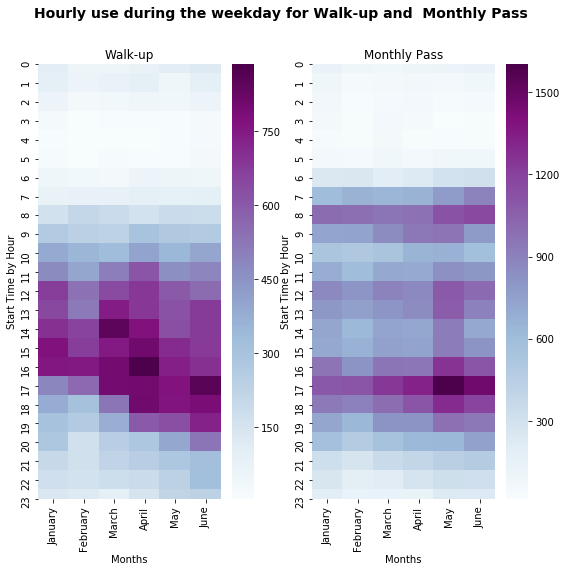

In [31]:
# Setting the monthes into order
df_clean['start_time_month'] = pd.Categorical(df_clean['start_time_month'], 
                                                categories=['January','February','March','April','May', 'June'], ordered=True)

# Make the figure size
plt.figure(figsize=(9,8))
plt.suptitle('Hourly use during the weekday for Walk-up and  Monthly Pass', fontsize=14, fontweight='semibold')

# function of heatmap
def heatmap(value):

    if (value == "Walk-up"):
        plt.subplot(1, 2, 1)
        df_cus = df_clean.query('passholder_type == "Walk-up"').groupby(["start_time_hour", "start_time_month"])["bike_id"].size().reset_index()
        df_cus = df_cus.pivot("start_time_hour", "start_time_month", "bike_id")
        sb.heatmap(df_cus, cmap="BuPu")

    
    else:
        plt.subplot(1, 2, 2)
        df_subs = df_clean.query('passholder_type == "Monthly Pass"').groupby(["start_time_hour", "start_time_month"])["bike_id"].size().reset_index()
        df_subs = df_subs.pivot("start_time_hour", "start_time_month", "bike_id")
        sb.heatmap(df_subs, cmap="BuPu")

    

    plt.title(value, y=1.014)
    plt.xlabel('Months')
    plt.ylabel('Start Time by Hour');
    
# Calling the function   
heatmap("Walk-up")
heatmap("Monthly Pass")

> ##### Walk-up: The heat map above shows us two cases. for the first case which is the Walk-up, we can recognize that on March to June the heat map became darker especially between 12 PM till 5 PM and peaking in March around 2 PM, April 4 PM, Jun 5 PM.
> ##### Monthly Pass: Starting from March, most bike rides occur around 8-9 AM and 4-6 PM.and peaking on June at 8 AM and 6 PM.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The heatmap did not show anything new based on the discussion in the previous sections, such as when and what time each passholder type uses the bike-sharing system. However, Walk-up use the system different time than the Monthly Pass. For Walk-up, as depicted in univariate explorations, most of the trips  on weekends but for the Monthly Pass, they prefer the weekday in the morning like 8 AM.

### Were there any interesting or surprising interactions between features?

>Nothing become out of what i expected here but i have notice two things:
* Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
*  3:00 AM has least bikers while 4:00 PM has the most bikers.

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle